In [1]:
import pandas as pd
import seaborn as sb
from sklearn.model_selection import train_test_split

sb.set_theme()

In [2]:
path_wide = "~/local_scratch/SynthCortical/scores.csv"
df_wide = pd.read_csv(path_wide, index_col=0)
df_wide["data"] = df_wide["data"].str.removeprefix("SynthCortical/")
df_wide.loc[0, "data"]

'sub-NDARXE854EDK_ses-VNav_gen-000/sub-NDARXE854EDK_ses-VNav_gen-000_corrupted_T1w.nii.gz'

In [3]:
subjects = df_wide["subject"].unique()
train, val_test = train_test_split(subjects, test_size=0.4)
val, test = train_test_split(val_test, test_size=0.5)
len(train), len(val), len(test)

(213, 71, 71)

<Axes: xlabel='group', ylabel='Percent'>

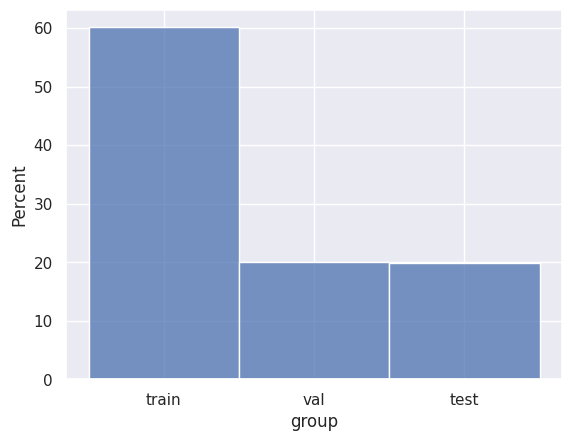

In [4]:
df_wide["group"] = "train"
df_wide.loc[df_wide["subject"].isin(val), "group"] = "val"
df_wide.loc[df_wide["subject"].isin(test), "group"] = "test"
df_wide[df_wide["subject"].isin(val)]["group"]
sb.histplot(df_wide, x="group", stat="percent")

In [5]:
df_wide.to_csv(path_wide)